In [4]:
import pandas as pd
import re

In [5]:
df = pd.read_csv("C:\\projects\\movie\\movie.csv")

In [6]:
review = df.iloc[0].text
review

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [7]:
words = (review.lower().replace(',','').replace('.','').replace('"','').replace("'",'').replace('(','').replace(')','').split())

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Michelle
[nltk_data]     Zhou\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Michelle
[nltk_data]     Zhou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Michelle
[nltk_data]     Zhou\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
stemmer = PorterStemmer()
stemmer.stem("consequentalism")

'consequent'

In [10]:
stemmedWords = set([stemmer.stem(i) for i in words])

In [66]:
stop_words = set(stopwords.words('english'))

In [67]:
def wordtime(i):
    x = df.iloc[i].text
    y = re.sub("\W+|_", " ", x.lower()).split()
    y = [w for w in y if not w in stop_words]
    z = set([stemmer.stem(i) for i in y])
    return list(z)

In [129]:
wordlist = []
for n in range(0,20000):
    wordlist.append(list(set(wordtime(n))))

In [130]:
len(wordlist)

20000

In [131]:
vocab = sorted(set([j for i in wordlist for j in i]))

In [132]:
len(vocab)

47860

In [133]:
num = {k: v for v, k in enumerate(vocab)}

In [134]:
con = [[num[i] for i in w] for w in wordlist]

In [135]:
len(wordlist[2])

85

In [136]:
long = []
for r in wordlist:
    long.append(len(r))
print(max(long))

531


In [137]:
sum(long)/len(long)

95.01005

(array([1.023e+03, 4.220e+03, 6.011e+03, 3.018e+03, 1.865e+03, 1.302e+03,
        8.080e+02, 5.760e+02, 3.970e+02, 2.560e+02, 1.780e+02, 1.410e+02,
        1.090e+02, 4.400e+01, 3.100e+01, 1.200e+01, 4.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00]),
 array([  3. ,  29.4,  55.8,  82.2, 108.6, 135. , 161.4, 187.8, 214.2,
        240.6, 267. , 293.4, 319.8, 346.2, 372.6, 399. , 425.4, 451.8,
        478.2, 504.6, 531. ]),
 <BarContainer object of 20 artists>)

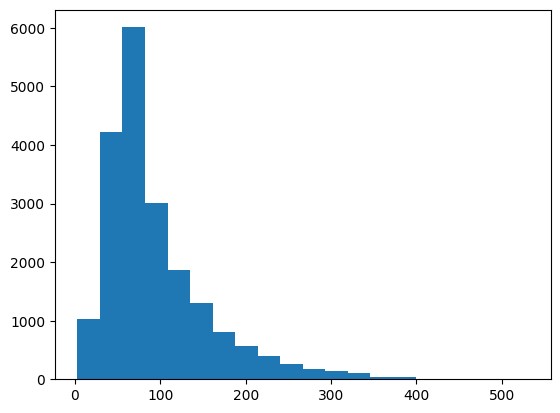

In [138]:
import matplotlib.pyplot as plt
plt.hist(long, bins=20)

In [139]:
x = [1,6,85,3,5,4,23]
y = [8,9,3]

In [140]:
x[:5]

[1, 6, 85, 3, 5]

In [141]:
while len(y) < 5:
    y = y + [-1]

In [154]:
def samelength(a):
    if len(a) > 100:
        a = a[:100]
    elif len(a) < 100:
        while len(a) < 100:
            a = a + [-1]
    else:
        pass
    return a

In [155]:
con2 = []
for C in con:
    con2.append(samelength(C))

In [156]:
set([len(i) for i in con2])

{100}

In [157]:
import sklearn

In [158]:
import numpy as np
from sklearn.model_selection import train_test_split

In [168]:
# X = input, matrix
# y = output, target, lowercase bc it is a vector (??)
X = con2
y = df["label"][:20000].values

In [ ]:
X = [X[i] + [long[i]] for i in range(len(X))] #length as part of ana

In [182]:
X = [nlp(word).vector for word in df['text'][:20000]] #word embeddings

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [185]:
clf = RandomForestClassifier(random_state=0)

In [186]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [187]:
clf.score(X_test, y_test) #try diff classifiers

0.73725

In [188]:
len(X), len(long)

(20000, 20000)

In [189]:
import spacy

In [190]:
nlp = spacy.load("en_core_web_md")